In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
pipeline = pd.read_excel('pipeline.xlsx')

# Count of Bids versus No Bids:
* the bid rate is 65%

In [10]:
pd.pivot_table(pipeline,index=['Bid_NoBid_Category'], values=['Bid_NoBid'], aggfunc= len, margins = True)

,Bid_NoBid
Bid_NoBid_Category,
Bid,10133.0
No Bid,5563.0
All,15696.0


# Of the 10133 "Bid", 1037 are "Oustanding" (i.e. not decided on yet), and 1452 are "Closed Other".  Therefore, only 7644 are eligible for "Win Rate" calculation.  Win = 4761

In [12]:
Bid1 = pd.pivot_table(pipeline,index=['Bid_NoBid_Category'], values=['Bid_NoBid'], columns=['WinLoseCategory'], aggfunc= len, margins = True)
Bid1

Bid_NoBid                                     
WinLoseCategory    Closed Other    Lose Outstanding     Win      All
Bid_NoBid_Category                                                  
Bid                      1452.0  2883.0      1037.0  4761.0  10133.0
No Bid                   5563.0     NaN         NaN     NaN   5563.0
All                      7015.0  2883.0      1037.0  4761.0  15696.0

In [13]:
Bid2 = Bid1.query('Bid_NoBid_Category == ["Bid"]')
Bid2

Bid_NoBid                                     
WinLoseCategory    Closed Other    Lose Outstanding     Win      All
Bid_NoBid_Category                                                  
Bid                      1452.0  2883.0      1037.0  4761.0  10133.0

In [235]:
# Eligible for "Win Rate" calculation

10133 - 1037 - 1452

7644

# Win Rate is 62%:

In [236]:
# Win Rate Calculation

float(4761) / float(7644)

0.6228414442700158

# Count of Win and Losses by Amount Range:

* As you can see, in amount <1m, there are are more wins than losses
* However, in other amount ranges, there are more losses than wins

In [14]:
pivot1 = pd.pivot_table(pipeline,index=['Amount Range'], values=['Win_Lose'], columns=['WinLoseCategory'], aggfunc= len, margins = True)

In [15]:
pivot1

Win_Lose                                    
WinLoseCategory Closed Other    Lose Outstanding     Win     All
Amount Range                                                    
1 - 1m                2552.0  1753.0       692.0  3956.0  6690.0
10m - 30m              353.0   100.0        26.0    60.0   207.0
1m - 10m              1139.0   629.0       193.0   559.0  1464.0
30m >                  181.0    46.0        19.0    30.0    97.0
Zero                  2790.0   355.0       107.0   156.0   638.0
All                   1452.0  2883.0         NaN  4761.0  9096.0

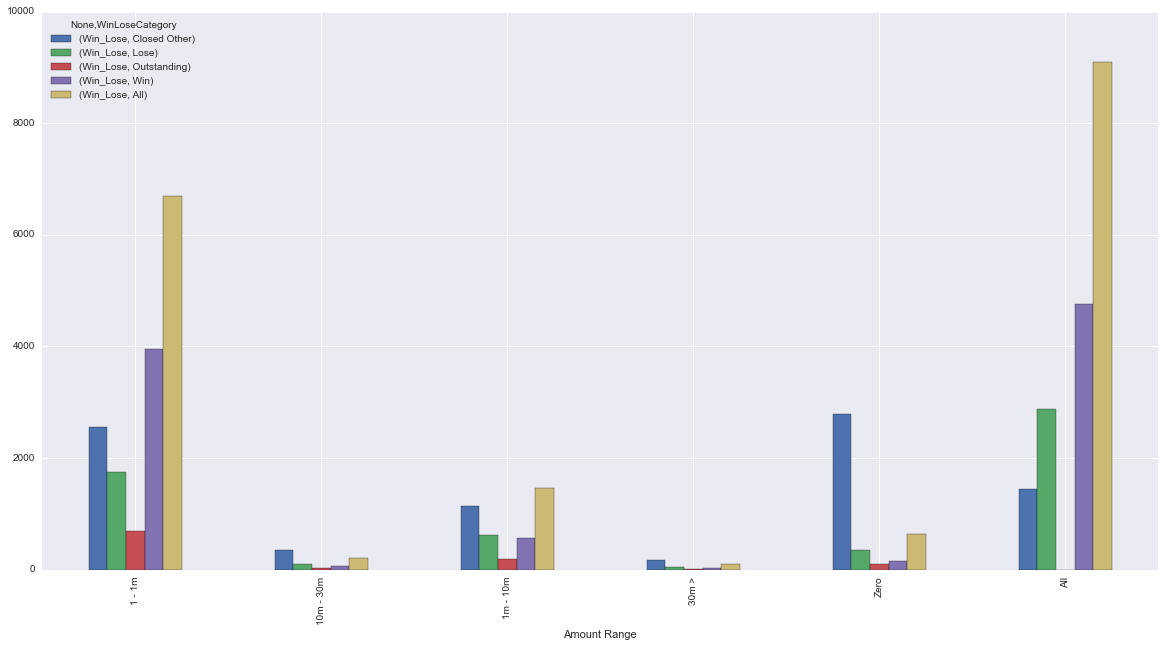

In [16]:
pivot1.plot(kind='bar',figsize=(20,10))

# Count of Wins and Losses by Contract Type:
* as expected, we tend to win more Fixed Price contracts (than the other contract types).  Fixed Price contracts are the most common type of contract type, so it's expected we would have more counts in that category.

In [17]:
pd.pivot_table(pipeline,index=['Contract Type'], values=['Win_Lose'], columns=['WinLoseCategory'], aggfunc= len, margins = True, fill_value=0)

Win_Lose                                    
WinLoseCategory   Closed Other    Lose Outstanding     Win     All
Contract Type                                                     
0                       3917.0     3.0         0.0     0.0     3.0
Commercial               617.0   171.0       127.0  1049.0  1549.0
Cost Reimbursable        571.0   464.0        93.0   682.0  1377.0
FP                       667.0   575.0       200.0  1344.0  2246.0
Non-Fee Bearing          703.0  1154.0       362.0   718.0  2204.0
Other                    239.0   136.0       101.0   197.0   417.0
T&M                      301.0   380.0       154.0   771.0  1300.0
All                     1452.0  2883.0         NaN  4761.0  9096.0

# Count of Wins and Losses by Market:
* The Health market has the highest counts

In [18]:
pd.pivot_table(pipeline,index=['Market'], values=['Win_Lose'], columns=['WinLoseCategory'], aggfunc= len, margins = True, fill_value=0)

Win_Lose                              \
WinLoseCategory                   Closed Other    Lose Outstanding     Win   
Market                                                                       
0                                       1859.0    91.0         8.0    53.0   
Additional Markets                       656.0   402.0       140.0   704.0   
Education & Workforce Development        292.0   172.0        97.0   375.0   
Energy & Environment                     774.0   461.0       166.0   966.0   
Food & Agriculture                       170.0    92.0        33.0   151.0   
Health                                  3045.0  1533.0       514.0  2055.0   
Multi-area                               219.0   132.0        79.0   457.0   
All                                     1452.0  2883.0         NaN  4761.0   

                                           
WinLoseCategory                       All  
Market                                     
0                                   222.0  
Additional Markets                 1401.0  
Education & Workforce Development   640.0  
Energy & Environment               1681.0  
Food & Agriculture                  285.0  
Health                             4151.0  
Multi-area                          716.0  
All                                9096.0

# Count of Wins and Losses by Win / Lose Category:

In [167]:
pd.pivot_table(pipeline,index=['WinLoseCat'], values=['Win / Lose'], aggfunc= len, margins = True)

,Win / Lose
WinLoseCat,
Closed Other,7015.0
Lose,2883.0
Outstanding,1037.0
Win,4761.0
All,9096.0


# Pivot of Win / Lose Category and Days in Pipeline by Stages:
* Comparing Wins versus losses, we can see that Wins spend more days in each of the pipeline stages

In [19]:
pd.pivot_table(pipeline,index=['WinLoseCategory'], values=['Days in Qualification','Days in Planning & Capture','Days in Proposal/Price Quote','Days in Negotiation','Days in Review'], aggfunc= np.sum, margins = True)

,Days in Negotiation,Days in Planning & Capture,Days in Proposal/Price Quote,Days in Qualification,Days in Review
WinLoseCategory,,,,,
Closed Other,947.0,49517.0,106401.0,383573.0,59546.0
Lose,2908.0,7068.0,59539.0,19780.0,242232.0
Outstanding,2649.0,8299.0,82882.0,28537.0,218924.0
Win,9467.0,12850.0,84554.0,32060.0,172784.0
All,15971.0,77734.0,333376.0,463950.0,693486.0


# Count of Wins / Losses by Win / Loss Category with Probability of Winning Range as column:

* as expected, the higher the probability, the higher the count of wins
* surprisingly it appears that opportunity leaders are labelling the probabilities relatively accurately in salesforce.

In [20]:
pd.pivot_table(pipeline,index=['WinLoseCategory'], values=['Win_Lose'],columns=['Probability of Winning Range'], aggfunc= len, margins = True)

Win_Lose                                          \
Probability of Winning Range        0  1 - 20 21 - 40 41 - 60 61 - 80 81 - 99   
WinLoseCategory                                                                 
Closed Other                   4018.0   664.0   814.0   647.0   341.0   226.0   
Lose                             12.0   711.0  1003.0   718.0   300.0    87.0   
Outstanding                      37.0   261.0   249.0   168.0    95.0    91.0   
Win                             119.0   169.0   406.0   583.0   660.0   864.0   
All                             152.0  1093.0  1725.0  1634.0  1170.0  1107.0   

                                                  
Probability of Winning Range Sole Source     All  
WinLoseCategory                                   
Closed Other                       305.0  1452.0  
Lose                                52.0  2883.0  
Outstanding                        136.0     NaN  
Win                               1960.0  4761.0  
All                               2215.0  9096.0

# Sum of B&P amounts by Win / Lose Category:
* Surprisingly we are spending more B&P money on losses than on wins

In [30]:
PivotBP = pd.pivot_table(pipeline,index=['WinLoseCategory'], values=['Actual B&P Amt','Estimated B&P Amt'], aggfunc= np.sum, margins = True)
PivotBP

,Actual B&P Amt,Estimated B&P Amt
WinLoseCategory,,
Closed Other,1.351936e+07,4.156797e+07
Lose,6.363901e+07,5.174423e+07
Outstanding,1.283889e+07,1.549466e+07
Win,5.649535e+07,3.996588e+07
All,1.464926e+08,1.487728e+08


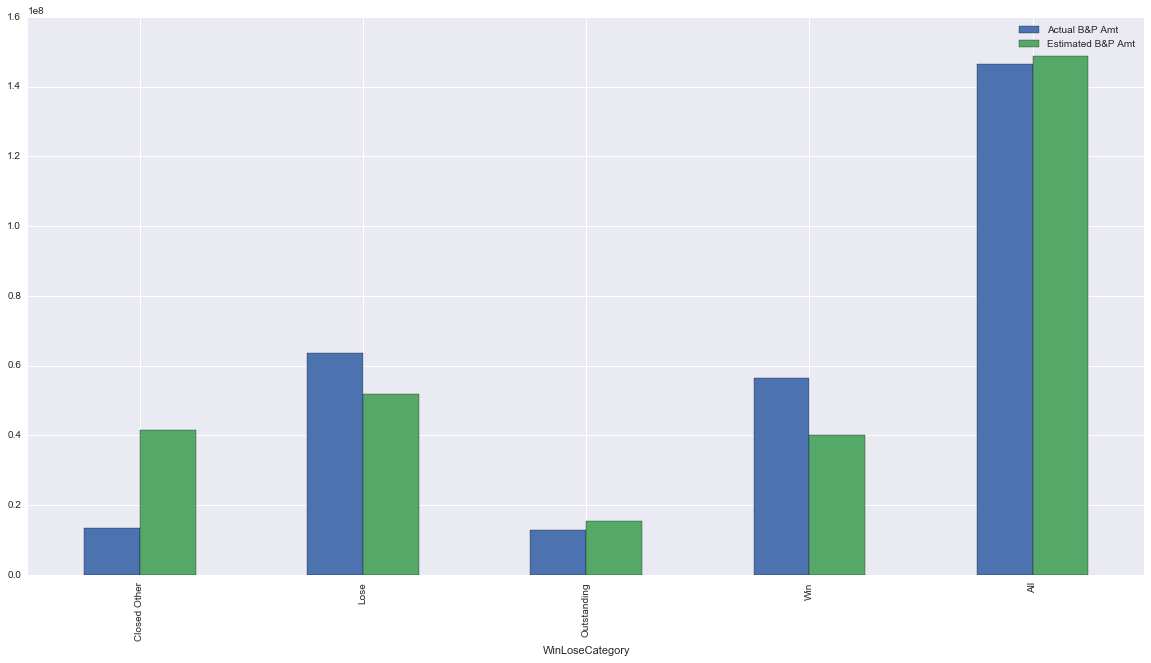

In [31]:
PivotBP.plot(kind='bar',figsize=(20,10))

# Why is the Amount column in scientific notation?
* I think it is because the max amount is $4 billion

In [76]:
pipeline['Amount'].describe()

count    1.569600e+04
mean     2.664631e+06
std      3.407707e+07
min      0.000000e+00
25%      6.000000e+03
50%      1.199790e+05
75%      6.956608e+05
max      4.000000e+09
Name: Amount, dtype: float64

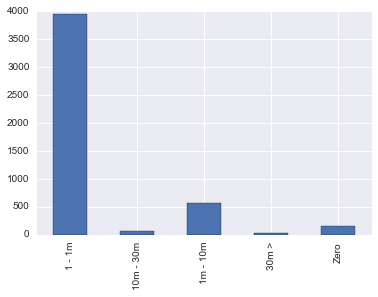

In [22]:
p = pipeline
p = p[p['Win_Lose'] == 1]
p['Amount Range'].value_counts().sort_index().plot(kind='bar')

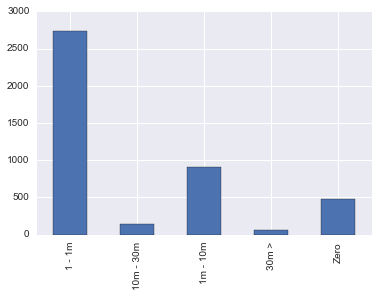

In [23]:
p = pipeline
p = p[p['Win_Lose'] == 0]
p['Amount Range'].value_counts().sort_index().plot(kind='bar')

# Count of Win / Losses summarized by Estimated Fee %:

In [24]:
pd.pivot_table(pipeline,index=['Estimated Fee %'], values=['Win_Lose'], columns=['WinLoseCategory'], aggfunc= len, margins = True)

Win_Lose                                    
WinLoseCategory Closed Other    Lose Outstanding     Win     All
Estimated Fee %                                                 
-0.38                    NaN     NaN         NaN     1.0     1.0
-0.22                    NaN     2.0         NaN     NaN     2.0
-0.15                    1.0     NaN         NaN     NaN     1.0
0.0                   5371.0  1210.0       469.0  1005.0  2591.0
0.0004                   1.0     NaN         NaN     NaN     NaN
0.0007                   NaN     NaN         1.0     NaN     NaN
0.001                    NaN     NaN         NaN     2.0     2.0
0.004                    NaN     NaN         NaN     2.0     2.0
0.005                    NaN     NaN         1.0     1.0     1.0
0.01                     2.0     5.0         1.0     6.0    12.0
0.012                    NaN     NaN         1.0     NaN     NaN
0.018                    NaN     NaN         NaN     2.0     2.0
0.02                     NaN     2.0         5.0     3.0     5.0
0.03                    11.0     9.0         7.0    37.0    50.0
0.035                    1.0     6.0         1.0    10.0    16.0
0.04                    10.0    16.0         6.0    45.0    66.0
0.045                    1.0     2.0         NaN     1.0     3.0
0.0476                   1.0     1.0         NaN     NaN     1.0
0.05                    69.0    71.0        59.0   103.0   211.0
0.051                    NaN     NaN         NaN     1.0     1.0
0.055                    NaN     NaN         1.0     9.0     9.0
0.0575                   NaN     NaN         NaN     3.0     3.0
0.0578                   NaN     NaN         NaN     1.0     1.0
0.058                    NaN     NaN         NaN     3.0     3.0
0.059                    1.0     NaN         NaN     NaN     NaN
0.06                    25.0    42.0        17.0    87.0   144.0
0.061                    1.0     NaN         NaN     NaN     1.0
0.063                    NaN     1.0         NaN     NaN     1.0
0.064                    NaN     NaN         NaN     1.0     1.0
0.065                    NaN     NaN         NaN     9.0     9.0
...                      ...     ...         ...     ...     ...
0.13                     9.0     4.0         2.0    20.0    29.0
0.135                    NaN     NaN         NaN     1.0     1.0
0.14                     3.0     NaN         1.0     9.0    10.0
0.15                   541.0   351.0       145.0  1098.0  1810.0
0.16                     8.0     2.0         1.0    18.0    25.0
0.162                    NaN     NaN         1.0     NaN     NaN
0.165                    NaN     NaN         NaN     1.0     1.0
0.17                     1.0     NaN         NaN    14.0    14.0
0.175                    1.0     NaN         NaN     NaN     NaN
0.18                     4.0     1.0         1.0     9.0    13.0
0.19                     1.0     NaN         NaN     5.0     6.0
0.2                     47.0    31.0        21.0   107.0   175.0
0.203                    NaN     NaN         NaN     1.0     1.0
0.24                     1.0     NaN         NaN     3.0     4.0
0.25                     5.0     2.0         4.0    15.0    22.0
0.27                     NaN     NaN         NaN     1.0     1.0
0.271                    NaN     NaN         NaN     1.0     1.0
0.28                     NaN     NaN         NaN     2.0     2.0
0.3                      2.0     1.0         1.0     3.0     5.0
0.31                     1.0     NaN         NaN     NaN     1.0
0.35                     NaN     NaN         NaN     1.0     1.0
0.37                     1.0     NaN         NaN     NaN     1.0
0.38                     NaN     NaN         NaN     2.0     2.0
0.4                      3.0     NaN         NaN     1.0     4.0
0.45                     1.0     NaN         1.0     1.0     2.0
0.5                      NaN     NaN         NaN     1.0     1.0
0.6                      1.0     NaN         NaN     NaN     NaN
1.0                      NaN     NaN         NaN     1.

# Pivot Amount, by WinLoseCat and Fiscal Year

In [25]:
pivot2 = pd.pivot_table(pipeline,index=['WinLoseCategory'], values=['Amount'], columns=['Fiscal Year'], aggfunc= np.sum,fill_value=0)

In [26]:
pivot2

Amount                                                  \
Fiscal Year            2011        2012        2013        2014        2015   
WinLoseCategory                                                               
Closed Other     3279876869  6629246175  3158672735  3800111519  3244466138   
Lose             1823404749   982073701   890278240   995296675  1164650524   
Outstanding          820860     1619370    11612032    10072545    33101995   
Win               945732097   572786694  1224243292   688993822  1174243274   

                                                        
Fiscal Year            2016        2017      2018 2019  
WinLoseCategory                                         
Closed Other     5680326078   735790226  30860000    0  
Lose             1337202361    30766278         0    0  
Outstanding       495918920  2021467740  19069730    0  
Win               804795811    36544429         0    0

# Filter above pivot for just Wins and Losses

In [27]:
pivot3 = pivot2.query('WinLoseCategory == ["Lose", "Win"]')
pivot3

Amount                                                \
Fiscal Year            2011       2012        2013       2014        2015   
WinLoseCategory                                                             
Lose             1823404749  982073701   890278240  995296675  1164650524   
Win               945732097  572786694  1224243292  688993822  1174243274   

                                                 
Fiscal Year            2016      2017 2018 2019  
WinLoseCategory                                  
Lose             1337202361  30766278    0    0  
Win               804795811  36544429    0    0

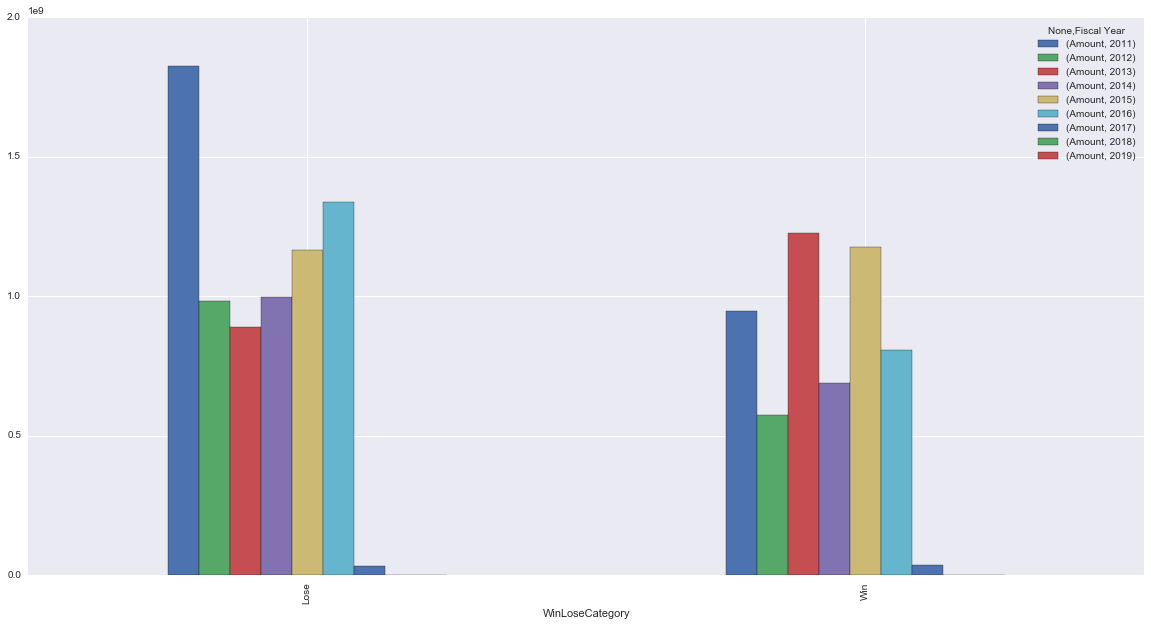

In [28]:
pivot3.plot(kind='bar',figsize=(20,10))

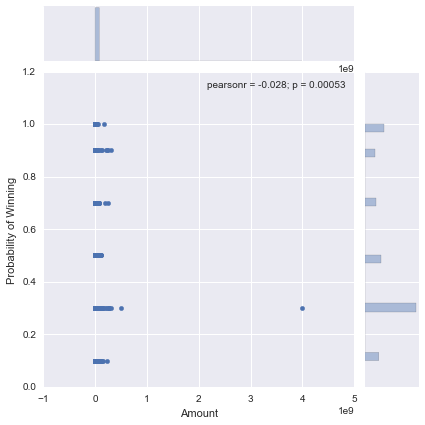

In [29]:
sns.jointplot(x='Amount', y='Probability of Winning',data = pipeline)

In [37]:
pd.pivot_table(pipeline,index=['WinLoseCategory'], values=['Adj Estimated Base + Option Duration'], aggfunc= np.sum,fill_value=0)

,Adj Estimated Base + Option Duration
WinLoseCategory,
Closed Other,224690
Lose,93086
Outstanding,33128
Win,84936


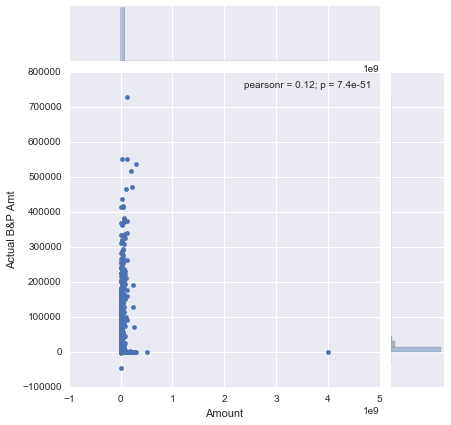

In [38]:
sns.jointplot(x='Amount', y='Actual B&P Amt',data = pipeline)